In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(0)

In [2]:
# Load the dataset
data = pd.read_csv("prices-split-adjusted.csv")

In [3]:
# Show some values
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
# Check for missing data
data.isnull().values.any()

False

In [105]:
data.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [5]:
# Count how many entries there are for each symbol
counts = data.groupby("symbol").symbol.count()
counts

symbol
A       1762
AAL     1762
AAP     1762
AAPL    1762
ABBV    1008
        ... 
YHOO    1762
YUM     1762
ZBH     1762
ZION    1762
ZTS      987
Name: symbol, Length: 501, dtype: int64

In [6]:
# What is the max count
counts.max()

1762

In [7]:
# Get AAPL values
aapl = data.loc[data.symbol == "AAPL"]
aapl = aapl.sort_values(["date"])

# Replace index with date
aapl.date = pd.to_datetime(aapl.date)
aapl.set_index("date", inplace=True)

In [8]:
# View AAPL data
aapl.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0


In [9]:
# Calculate statistics
aapl.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,79.427744,79.402683,78.640034,80.140447,9.422578e+07
std,28.339001,28.330794,28.108525,28.561027,6.020519e+07
min,27.481428,27.435715,27.178572,28.000000,1.147590e+07
25%,55.401787,55.450000,54.672501,55.909286,4.917478e+07
50%,78.742146,78.435711,77.631428,79.344284,8.050385e+07
75%,102.979998,103.092503,102.500000,104.424997,1.210816e+08
max,134.460007,133.000000,131.399994,134.539993,4.702495e+08


In [10]:
# Calculate correlations
aapl.corr()

,open,close,low,high,volume
open,1.000000,0.999254,0.999605,0.999673,-0.582824
close,0.999254,1.000000,0.999657,0.999660,-0.585669
low,0.999605,0.999657,1.000000,0.999511,-0.591664
high,0.999673,0.999660,0.999511,1.000000,-0.578681
volume,-0.582824,-0.585669,-0.591664,-0.578681,1.000000


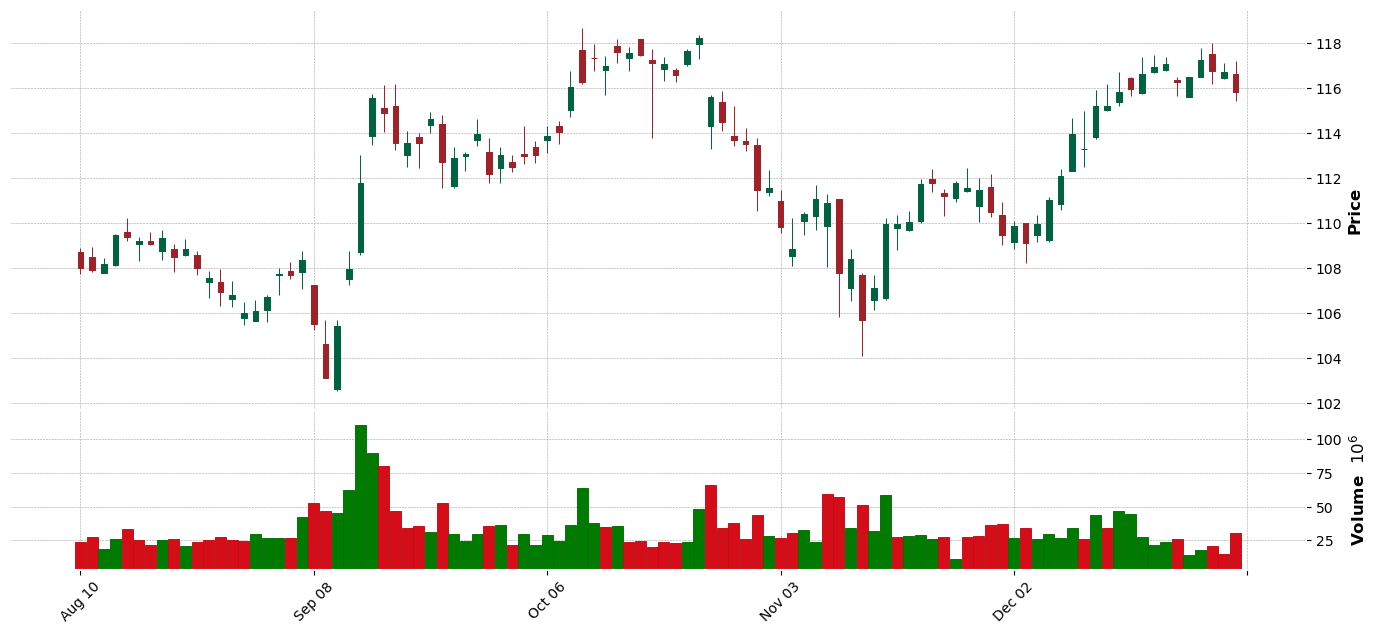

In [106]:
# Create a candlestick chart
mpf.plot(aapl[-100:], type="candle", style="charles", volume=True, figsize=(18,8))

In [76]:
# Rescale data
scaler = StandardScaler()
aapl_scaled = aapl[["open", "close", "low", "high", "volume"]]
aapl_scaled = scaler.fit_transform(aapl_scaled)
aapl_scaled = pd.DataFrame(aapl_scaled, columns=[["open", "close", "low", "high", "volume"]])

In [77]:
# Average calcultaion
num_rows = aapl_scaled.count().close
predicted = []
for i in range(num_rows-1):
    predicted.append(aapl_scaled[:i+1].close.mean())

In [78]:
# Calculate score for average
target = aapl_scaled.close[1:]
msr = mean_squared_error(target, predicted)
rmsr = np.sqrt(msr)
r2 = r2_score(target, predicted)
print(msr)
print(rmsr)
print(r2)

1.0015453563621632
1.00077237989573
-0.0026693219956039904


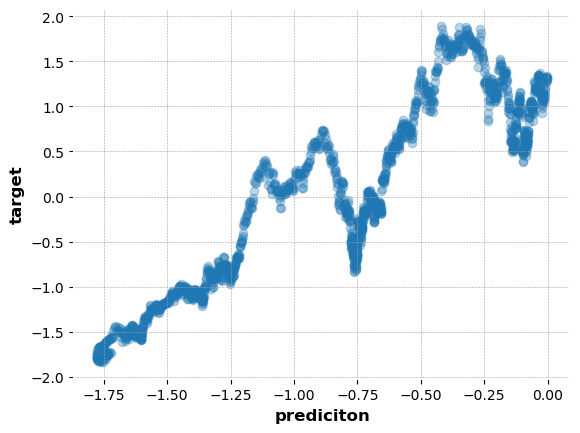

In [79]:
# Plot predicted values against target values
plt.scatter(predicted, target, alpha=0.3)
plt.xlabel("prediciton")
plt.ylabel("target");

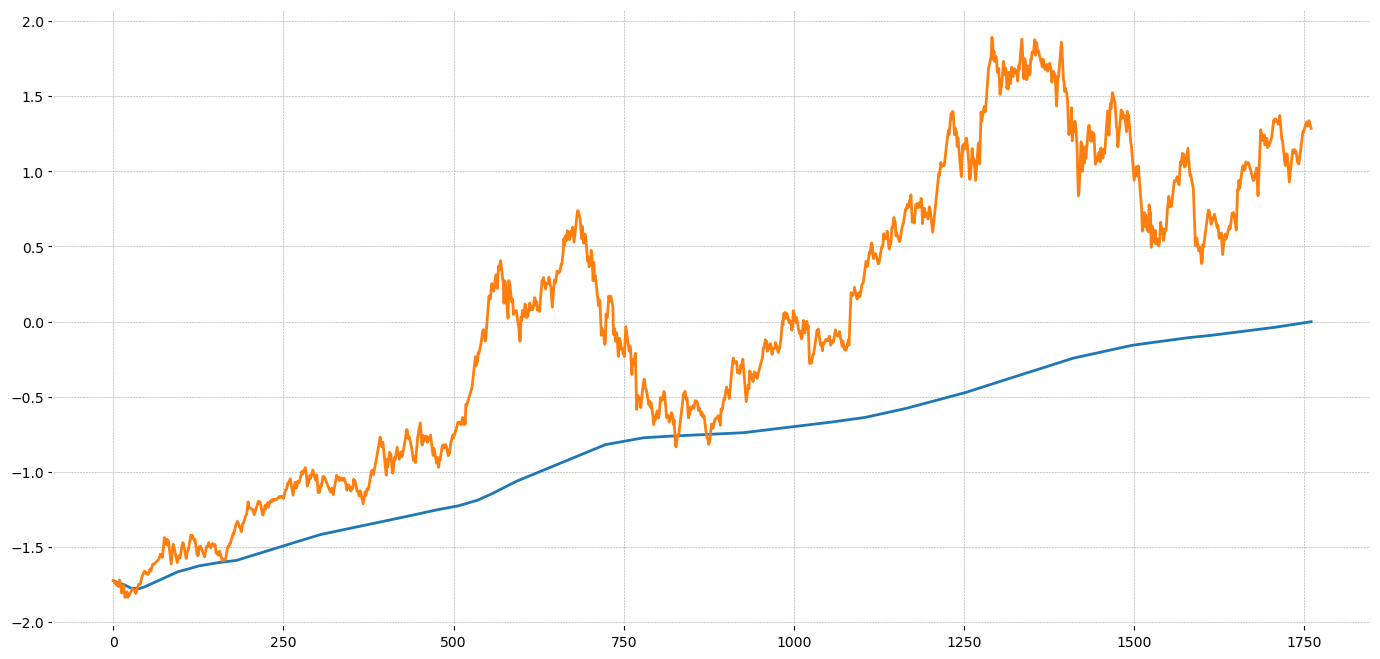

In [80]:
# Plot real and predicted prices over time
xs = range(len(predicted))
plt.figure(figsize=(17,8))
plt.plot(xs, predicted)
plt.plot(xs, target);

In [81]:
# Moving average calculation
N = 5
predicted = aapl_scaled.close.rolling(N).mean()
predicted = predicted.values.tolist()
predicted = predicted[N:]

In [82]:
# Calculate score for moving average
target = aapl_scaled.close[N:]
msr = mean_squared_error(target, predicted)
rmsr = np.sqrt(msr)
r2 = r2_score(target, predicted)
print(msr)
print(rmsr)
print(r2)

0.0026989243467956388
0.05195117271819414
0.9972855545464538


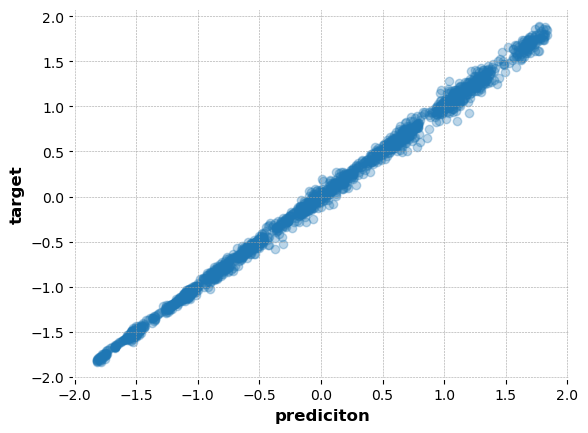

In [83]:
# Plot predicted values against target values
plt.scatter(predicted, target, alpha=0.3)
plt.xlabel("prediciton")
plt.ylabel("target");

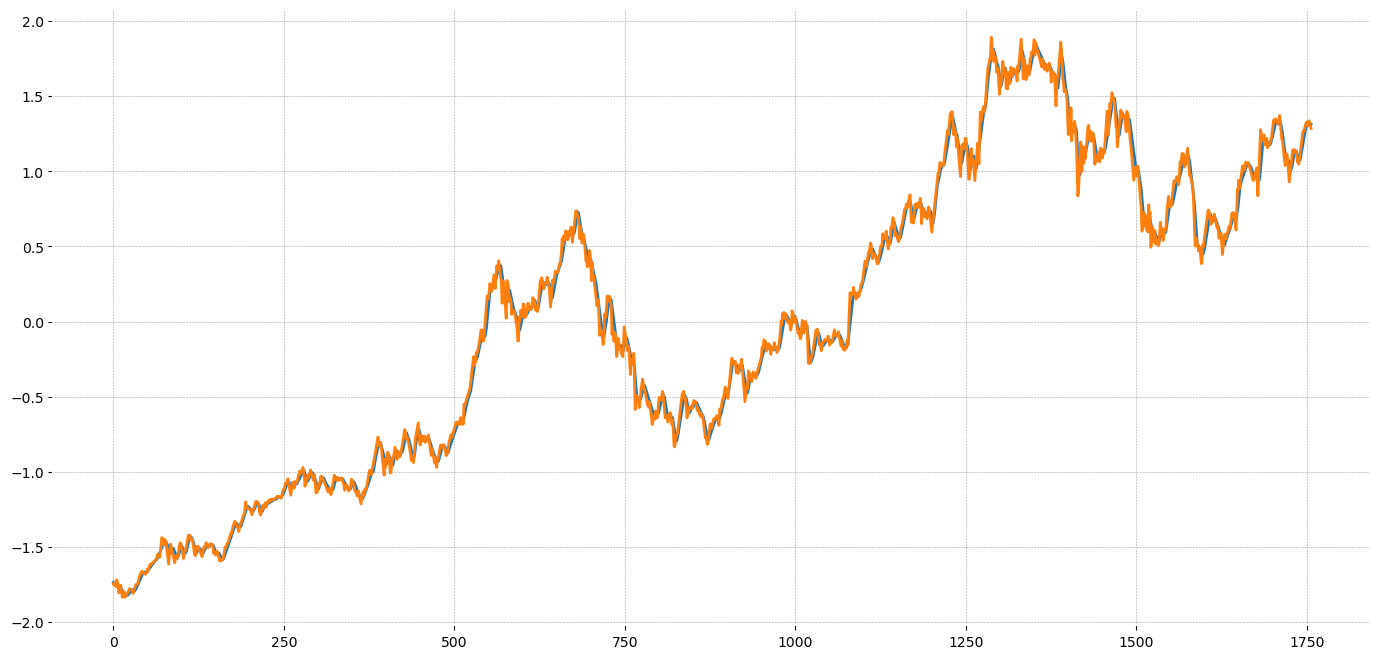

In [84]:
# Plot real and predicted prices over time
xs = range(len(predicted))
plt.figure(figsize=(17,8))
plt.plot(xs, predicted)
plt.plot(xs, target);

In [85]:
# Exponential weighted average
predicted = aapl_scaled.close.ewm(com=0.2).mean()
predicted = predicted[:-1]

In [86]:
# Calculate score for moving average
target = aapl_scaled.close[1:]
msr = mean_squared_error(target, predicted)
rmsr = np.sqrt(msr)
r2 = r2_score(target, predicted)
print(msr)
print(rmsr)
print(r2)

0.0023121511651115908
0.048084833004925685
0.9976852540662817


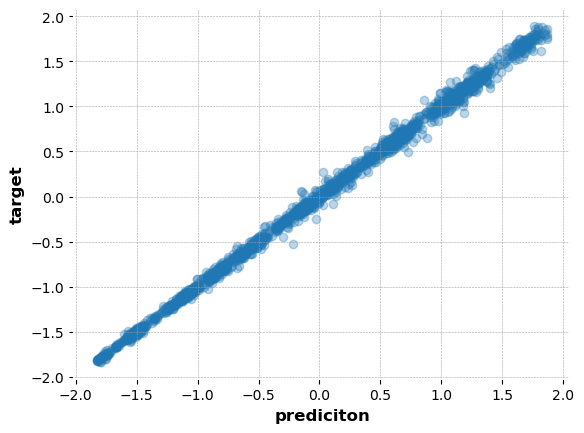

In [87]:
# Plot predicted values against target values
plt.scatter(predicted, target, alpha=0.3)
plt.xlabel("prediciton")
plt.ylabel("target");

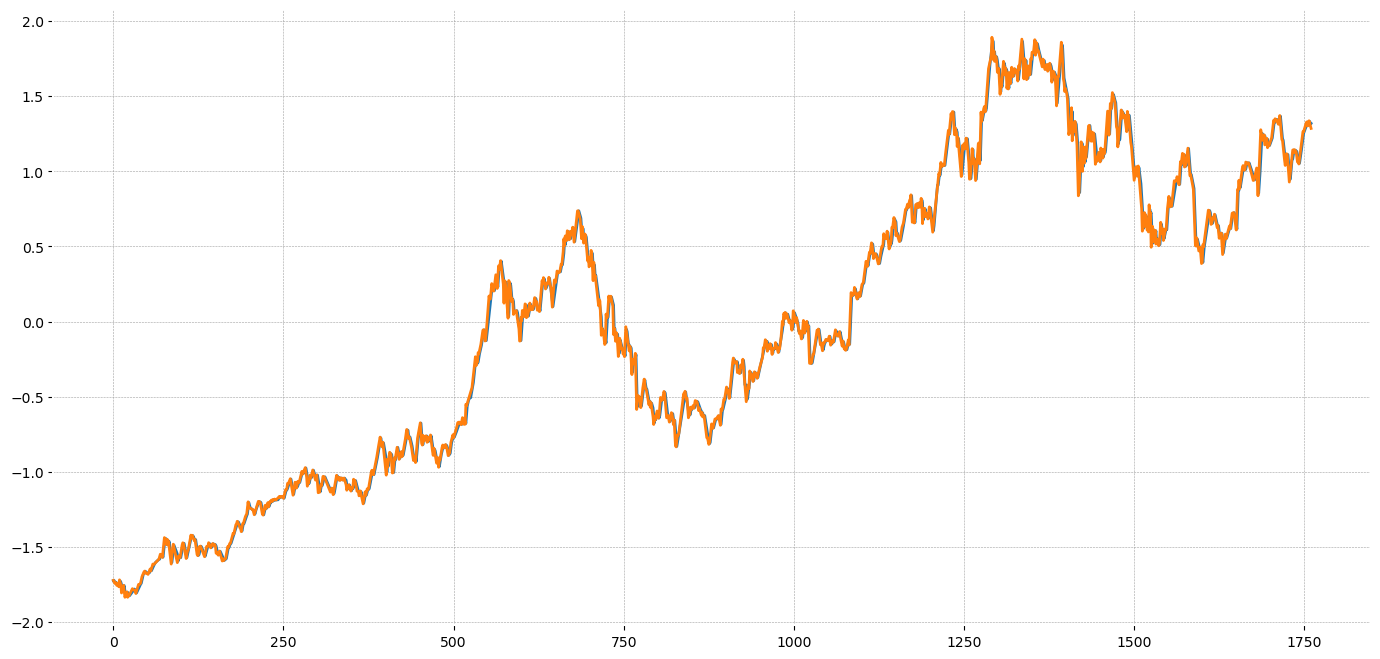

In [88]:
# Plot real and predicted prices over time
xs = range(len(predicted))
plt.figure(figsize=(17,8))
plt.plot(xs, predicted)
plt.plot(xs, target);

In [89]:
# Prep data for training a linear regression
N = 10
X = []
y = []

for window in aapl_scaled.rolling(window=N+1):
    if len(window) == N+1:
        # Concatenate all lists
        temp = window[:-1].values.tolist()
        temp = [j for i in temp for j in i]

        X.append(temp)
        y.append(window.close.values[-1][0])
        

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train);

In [91]:
# Score model
predicted = model.predict(X_test)
msr = mean_squared_error(y_test, predicted)
rmsr = np.sqrt(msr)
r2 = r2_score(y_test, predicted)
print(msr)
print(rmsr)
print(r2)

0.0026731993682495795
0.0517029918694226
0.9974701724844164


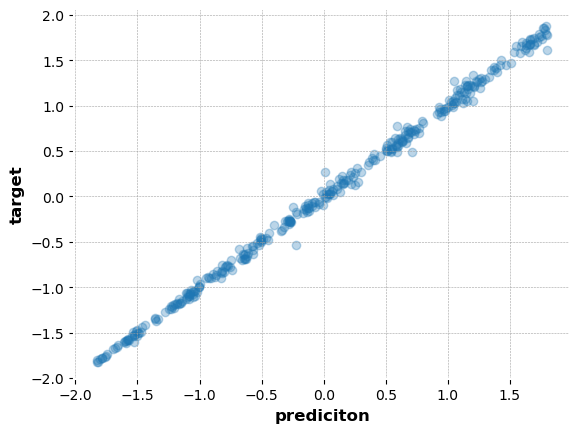

In [92]:
# Plot predicted values against target values
plt.scatter(predicted, y_test, alpha=0.3)
plt.xlabel("prediciton")
plt.ylabel("target");

In [94]:
# Model coefficients
len(model.coef_)

50

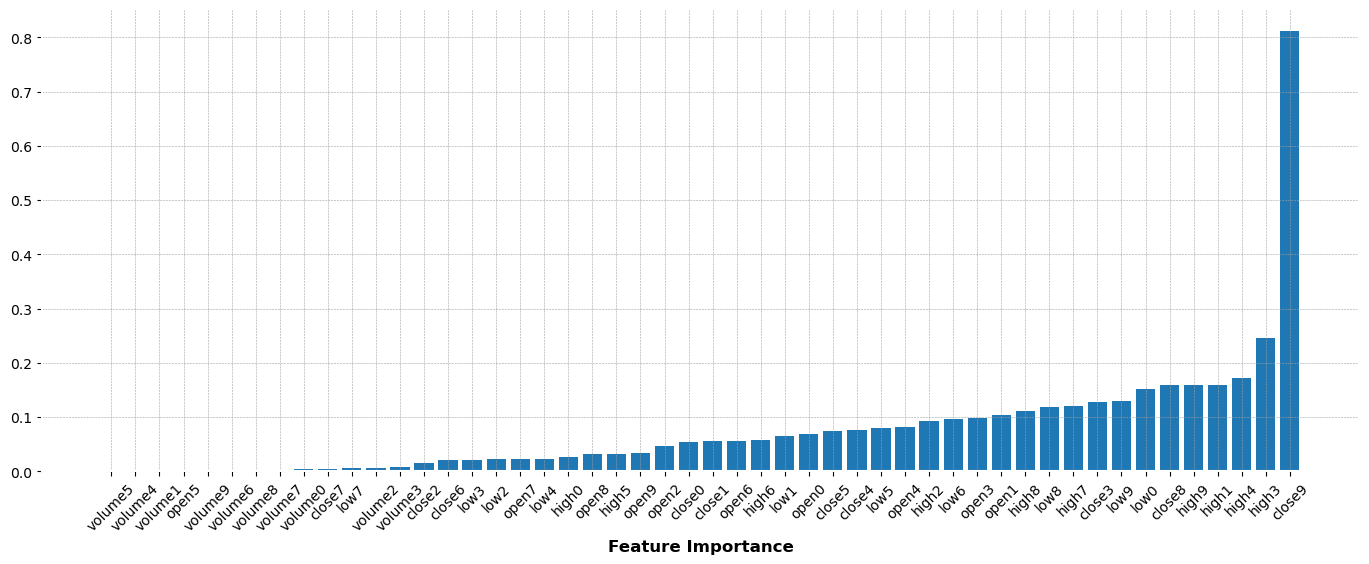

In [104]:
# Identify most influential features
def_names = ["open", "close", "low", "high", "volume"]
feature_names = []
for i in range(N):
    for name in def_names:
        feature_names.append(f"{name}{i}")

feature_importances = np.abs(model.coef_)
df = pd.DataFrame(
    dict(
        names = feature_names,
        importances = feature_importances
    )
)
df.sort_values('importances', inplace=True)
plt.figure(figsize=(17,6))
plt.bar('names', 'importances', data=df)
plt.xlabel("Feature Importance")
plt.xticks(rotation=45);